In [9]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
import pandas as pd

In [10]:
data = pd.read_csv('../../data/penguins_normalized_standardized.csv')

# Comparaison des modèles avec nested-CV

In [11]:
from sklearn.model_selection import StratifiedKFold
# classifiers 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

pca = PCA(n_components=9)
X = pca.fit_transform(data.drop(columns='species'))[:,0:2]
y = data['species']
cv_outer = StratifiedKFold(n_splits=10, random_state=1729, shuffle=True)

# NESTED CROSS VALIDATION 
err_cv_nested = pd.DataFrame()
# (1) outer cross validation 
for idx_train, idx_test in cv_outer.split(X, y):
    X_outer_train, y_outer_train = X[idx_train], y[idx_train]
    X_outer_test, y_outer_test = X[idx_test], y[idx_test]

    # (2) inner cross validation
    # (2.1) K plus proche voisin  (modèle avec hyper-paramètres)
    n_neighbors_list = np.arange(1, 100, 1)
    param_grid = {"n_neighbors": n_neighbors_list}
    cls = KNeighborsClassifier()
    search_knn = GridSearchCV(cls, param_grid, scoring="accuracy", cv=10)
    search_knn.fit(X_outer_train, y_outer_train)
    # training the knn model utilisant optimal K
    knn_cv_model = KNeighborsClassifier(n_neighbors=search_knn.best_params_["n_neighbors"])
    knn_cv_model.fit(X_outer_train, y_outer_train)

    # LDA
    lda = LinearDiscriminantAnalysis()
    modelLDA = lda.fit(X_outer_train, y_outer_train)
    # QDA
    qda = QuadraticDiscriminantAnalysis()
    modelQDA = qda.fit(X_outer_train, y_outer_train)
    
    # NB
    nb = GaussianNB()
    modelNB = nb.fit(X_outer_train, y_outer_train)
    
    # LR
    lr = LogisticRegression()
    modelLR = lr.fit(X_outer_train, y_outer_train)
    
    # DT
    dt = DecisionTreeClassifier()
    modelDT = dt.fit(X_outer_train, y_outer_train)
    
    # (1.1) Computing real accuracy 
    y_pred_knn = knn_cv_model.predict(X_outer_test)
    y_pred_lda = modelLDA.predict(X_outer_test)
    y_pred_qda = modelQDA.predict(X_outer_test)
    y_pred_nb = modelNB.predict(X_outer_test)
    y_pred_lr = modelLR.predict(X_outer_test)
    y_pred_dt = modelDT.predict(X_outer_test)
    
    
    # accuracy 
    acc_knn = accuracy_score(y_pred_knn, y_outer_test)
    acc_lda = accuracy_score(y_pred_lda, y_outer_test)
    acc_qda = accuracy_score(y_pred_qda, y_outer_test)
    acc_nb = accuracy_score(y_pred_nb, y_outer_test)
    acc_lr = accuracy_score(y_pred_lr, y_outer_test)
    acc_dt = accuracy_score(y_pred_dt, y_outer_test)
    
    err_cv_nested = err_cv_nested.append({"model": "KNN", "accuracy": acc_knn},ignore_index=True)
    err_cv_nested = err_cv_nested.append({"model": "LDA", "accuracy": acc_lda},ignore_index=True)
    err_cv_nested = err_cv_nested.append({"model": "QDA", "accuracy": acc_qda},ignore_index=True)
    err_cv_nested = err_cv_nested.append({"model": "NB", "accuracy": acc_nb},ignore_index=True)
    err_cv_nested = err_cv_nested.append({"model": "LR", "accuracy": acc_lr},ignore_index=True)
    err_cv_nested = err_cv_nested.append({"model": "DT", "accuracy": acc_dt},ignore_index=True)

err_cv_nested

,accuracy,model
0,0.971429,KNN
1,0.971429,LDA
2,0.971429,QDA
3,0.971429,NB
4,0.942857,LR
5,0.971429,DT
6,0.971429,KNN
7,0.942857,LDA
8,1.000000,QDA
9,1.000000,NB


In [16]:
df = pd.DataFrame(err_cv_nested)
df["accuracy"].unique()

array([0.97142857, 0.94285714, 1.        , 0.91428571, 0.97058824,
       0.94117647])

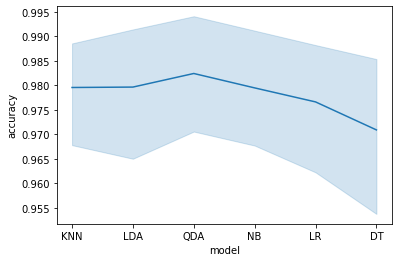

In [21]:
sns.lineplot(x="model", y="accuracy", data=err_cv_nested, err_style="band")
plt.show()
